In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
df = pd.read_csv('smoke_shops_census_updated_clean_fixed.csv')

In [5]:
%%R

df = read.csv('smoke_shops_census_updated_clean_fixed.csv')
head(df)



  census_tract med_inc_estimate med_age_estimate perc_poverty_estimate
1   3.6005e+10           115064             40.7                  14.1
2   3.6005e+10           100553             36.3                   6.0
3   3.6005e+10            41362             43.9                  15.0
4   3.6005e+10            49500             32.4                  28.6
5   3.6005e+10            67375             35.2                  32.3
6   3.6005e+10            19743             32.4                  47.3
  perc_owners perc_ethnic counts
1    60.21053    69.75359      2
2    61.02209    69.68196      4
3    20.58957    62.89461      2
4     0.00000    48.41816      1
5    15.17094    77.37653      2
6     0.00000    57.24382      1


In [6]:
%%R

#require ggplot
library(ggplot2)

# Single variable with median age

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = counts ~ med_age_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8801 -1.6544 -0.5186  1.1499 13.7859 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.881108   0.334640  17.574  < 2e-16 ***
med_age_estimate -0.070000   0.008668  -8.075 1.28e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.28 on 1658 degrees of freedom
Multiple R-squared:  0.03784,	Adjusted R-squared:  0.03726 
F-statistic: 65.21 on 1 and 1658 DF,  p-value: 1.282e-15



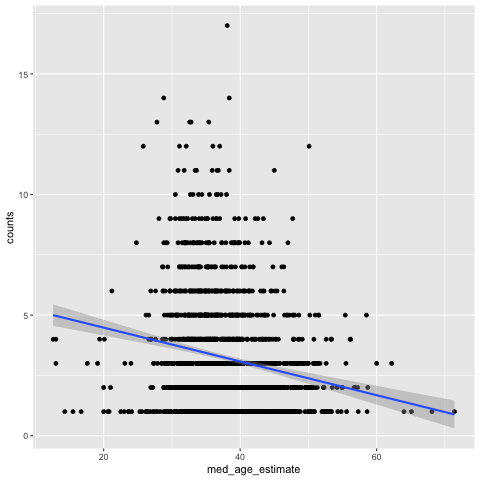

In [7]:
%%R 

plt <- ggplot(df, aes(x = med_age_estimate, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(counts ~ med_age_estimate, data = df)
summary(model)

# Single variable with median income

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = counts ~ med_inc_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7494 -1.7447 -0.5333  1.0691 13.5293 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.836e+00  1.378e-01  27.841  < 2e-16 ***
med_inc_estimate -7.631e-06  1.547e-06  -4.932 8.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.308 on 1658 degrees of freedom
Multiple R-squared:  0.01446,	Adjusted R-squared:  0.01387 
F-statistic: 24.33 on 1 and 1658 DF,  p-value: 8.946e-07



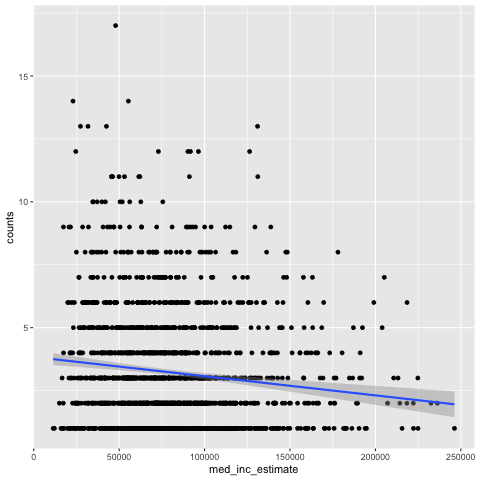

In [8]:
%%R 

plt <- ggplot(df, aes(x = med_inc_estimate, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(counts ~ med_inc_estimate, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = counts ~ med_inc_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7494 -1.7447 -0.5333  1.0691 13.5293 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.836e+00  1.378e-01  27.841  < 2e-16 ***
med_inc_estimate -7.631e-06  1.547e-06  -4.932 8.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.308 on 1658 degrees of freedom
Multiple R-squared:  0.01446,	Adjusted R-squared:  0.01387 
F-statistic: 24.33 on 1 and 1658 DF,  p-value: 8.946e-07



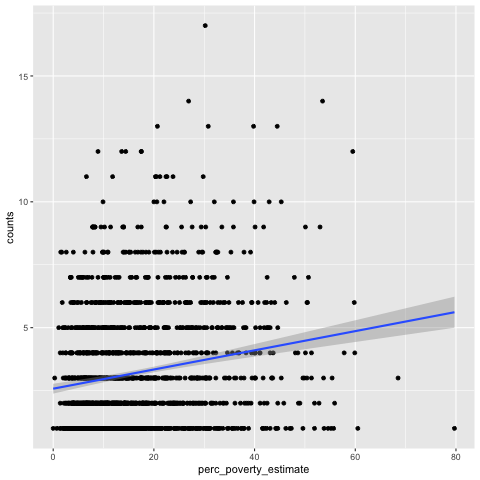

In [18]:
%%R 

plt <- ggplot(df, aes(x = perc_poverty_estimate, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plt)

model <- lm(counts ~ med_inc_estimate, data = df)
summary(model)

# Single variable with percentage owners in neighbourhood

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = counts ~ perc_owners, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0786 -1.6041 -0.5661  1.1191 13.3601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.078625   0.098930   41.23   <2e-16 ***
perc_owners -0.024341   0.002318  -10.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.251 on 1658 degrees of freedom
Multiple R-squared:  0.06236,	Adjusted R-squared:  0.06179 
F-statistic: 110.3 on 1 and 1658 DF,  p-value: < 2.2e-16



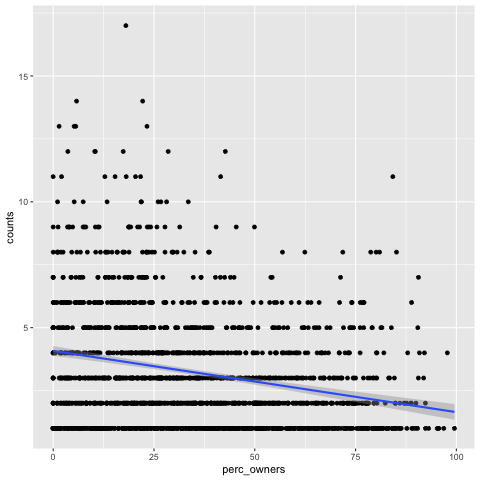

In [9]:
%%R 

plot <- ggplot(df, aes(x = perc_owners, y = counts)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(counts ~ perc_owners, data = df)
summary(model)

# multivariate model

In [10]:
%%R

model <- lm(counts ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, data = df)
summary(model)


Call:
lm(formula = counts ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7214 -1.5709 -0.5303  1.0831 13.3168 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.523498   0.429068  10.543  < 2e-16 ***
med_age_estimate      -0.033418   0.009766  -3.422 0.000637 ***
perc_poverty_estimate  0.013867   0.006000   2.311 0.020949 *  
perc_owners           -0.016549   0.002993  -5.529 3.73e-08 ***
perc_ethnic            0.004166   0.002103   1.981 0.047754 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.239 on 1655 degrees of freedom
Multiple R-squared:  0.07403,	Adjusted R-squared:  0.0718 
F-statistic: 33.08 on 4 and 1655 DF,  p-value: < 2.2e-16



# Possion model

In [11]:
%%R

model <- glm(counts ~ med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, data = df, family="poisson")
summary(model)


Call:
glm(formula = counts ~ med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, family = "poisson", data = df)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.5884790  0.1092874  14.535  < 2e-16 ***
med_age_estimate      -0.0105671  0.0024604  -4.295 1.75e-05 ***
perc_poverty_estimate  0.0034391  0.0014088   2.441   0.0146 *  
perc_owners           -0.0057189  0.0007660

  -7.466 8.26e-14 ***
perc_ethnic            0.0013955  0.0005486   2.544   0.0110 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2458.7  on 1659  degrees of freedom
Residual deviance: 2248.1  on 1655  degrees of freedom
AIC: 6982.6

Number of Fisher Scoring iterations: 5



# Plotting the residuals


Attaching package: ‘flexplot’

The following object is masked from ‘package:ggplot2’:

    flip_data



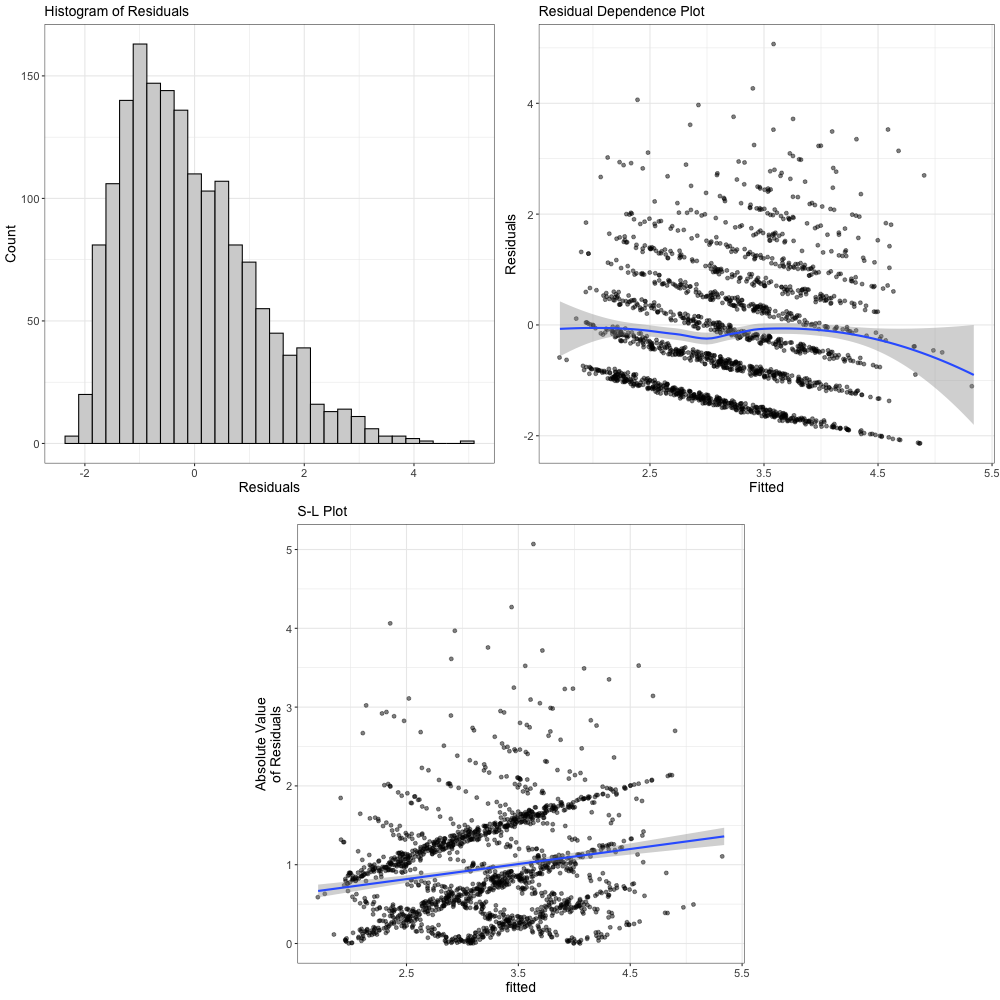

In [12]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")


In [13]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

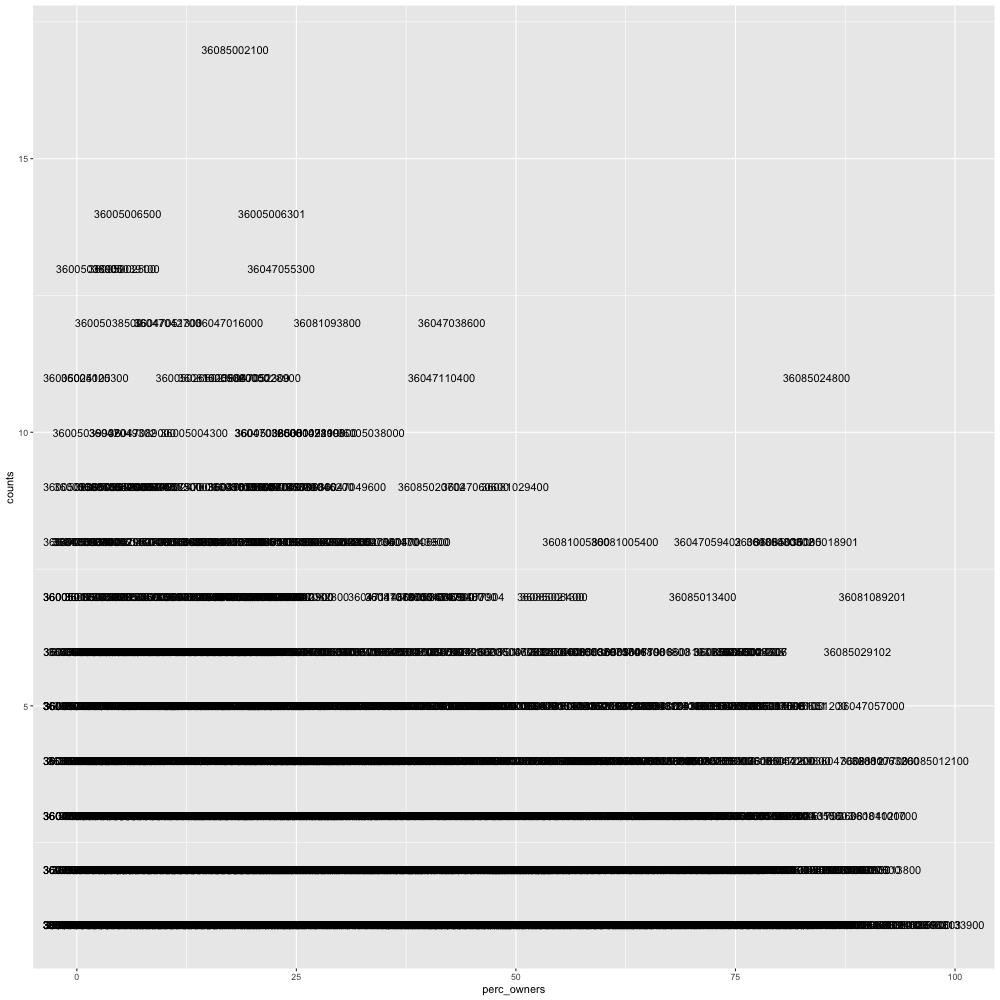

In [14]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = perc_owners, y = counts) + 
    # geom_point() 
    geom_text(aes(label = census_tract)) 
    

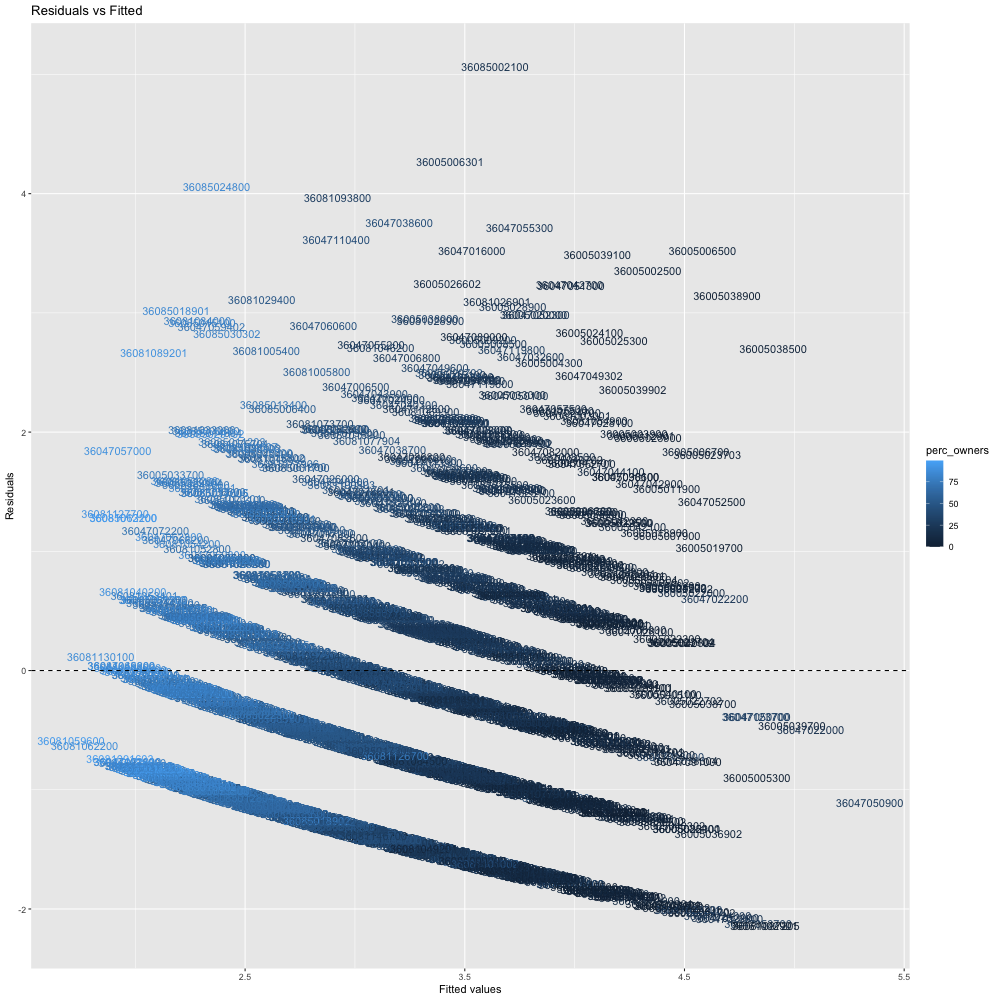

In [31]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=perc_owners) + 
    # geom_point() + 
    geom_text(aes(label = census_tract)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

In [15]:
%%R

residuals <- residuals(model)
head(residuals)

         1          2          3          4          5          6 
-0.3947745  0.7719880 -0.6929586 -1.8397009 -1.0406956 -1.9710325 


In [16]:
%%R

df$residuals <- residuals
head(df)

  census_tract med_inc_estimate med_age_estimate perc_poverty_estimate
1   3.6005e+10           115064             40.7                  14.1
2   3.6005e+10           100553             36.3                   6.0
3   3.6005e+10            41362             43.9                  15.0
4   3.6005e+10            49500             32.4                  28.6
5   3.6005e+10            67375             35.2                  32.3
6   3.6005e+10            19743             32.4                  47.3
  perc_owners perc_ethnic counts  residuals
1    60.21053    69.75359      2 -0.3947745
2    61.02209    69.68196      4  0.7719880
3    20.58957    62.89461      2 -0.6929586
4     0.00000    48.41816      1 -1.8397009
5    15.17094    77.37653      2 -1.0406956
6     0.00000    57.24382      1 -1.9710325


In [140]:
%%R

#export df as csv
write.csv(df, 'smoke_shops_census_residuals.csv', row.names=FALSE)
